# DataSets

In [1]:
# Import required libarires
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Create dictionary of brands and map keywords to the brand names

brand_mapping = {
    # Fashion Brands
    'Louis Vuitton': 'Louis Vuitton', 'Louis': 'Louis Vuitton', 'LV': 'Louis Vuitton',
    'Gucci': 'Gucci',
    'Versace': 'Versace', 'Medusa': 'Versace',
    'Balenciaga': 'Balenciaga', 'Balenci': 'Balenciaga', 'Balenci\'s': 'Balenciaga',
    'Givenchy': 'Givenchy',
    
    # Alcohol Brands
    'Hennessy': 'Hennessy', 'Henny': 'Hennessy', 'Hen': 'Hennessy',
    'Cristal': 'Cristal', 'Crist': 'Cristal', 'Bubbles': 'Cristal',
    'Patrón': 'Patrón', 'Pat': 'Patrón',
    'Ciroc': 'Ciroc', 'Diddy Juice': 'Ciroc',
    
    # Car Brands
    'Lamborghini': 'Lamborghini', 'Lambo': 'Lamborghini', 'Ghini': 'Lamborghini',
    'Ferrari': 'Ferrari', 'Rari': 'Ferrari', 'Ferr': 'Ferrari',
    'Porsche': 'Porsche', 'Porscha': 'Porsche',
    'Bentley': 'Bentley', 'Bent': 'Bentley',
    'Rolls-Royce': 'Rolls-Royce', 'Rolls': 'Rolls-Royce', 'Ghost': 'Rolls-Royce',
    'Mercedes-Benz': 'Mercedes-Benz', 'Mercedes': 'Mercedes-Benz', 'Benz': 'Mercedes-Benz', 'Merc': 'Mercedes-Benz', 'Benzo': 'Mercedes-Benz', 'S Class': 'Mercedes-Benz', 'G-Wagon': 'Mercedes-Benz', 'G Wagon': 'Mercedes-Benz',
    
    # Watch Brands
    'Rolex': 'Rolex', 'Rolly': 'Rolex', 'Roley': 'Rolex',
    'Patek Philippe': 'Patek Philippe', 'Patek': 'Patek Philippe', 'AP': 'Patek Philippe',
    'Hublot': 'Hublot', 'Big Bang': 'Hublot',
    
    # Other Brands
    'Nike': 'Nike', 'Swoosh': 'Nike', 'Nikes': 'Nike', 'Jordans' : 'Nike',
    'Adidas': 'Adidas', 'Stripes': 'Adidas', 'Adi': 'Adidas',
    'Supreme': 'Supreme', 'Sup': 'Supreme'
}

brands = list(set(brand_mapping.keys()).union(set(brand_mapping.values())))


# Drake

In [2]:
drake_df = pd.read_csv('lyrics/drake.txt', sep = '\t', header = None, names = ['Drake'])

In [3]:
drake_df.describe()

,Drake
count,2257
unique,2123
top,So I don't plan on stoppin' at all
freq,5


In [41]:

# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = drake_df['Drake'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_drake = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_drake.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_drake = brand_totals_drake.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
drake_total_only = brand_totals_drake[:1].copy()
drake_total_only.iloc[0, 0] = 'Drake'

# Result
print(brand_totals_drake)

# If you want to save this to a CSV file:
# brand_totals.to_csv('brand_mentions.csv', index=False)

             Brand  Total Mentions
0            Total            65.0
1    Mercedes-Benz            12.0
2      Rolls-Royce            12.0
3         Hennessy            10.0
4             Nike             7.0
5          Bentley             6.0
6    Louis Vuitton             5.0
7          Ferrari             4.0
8            Gucci             3.0
9   Patek Philippe             2.0
10        Givenchy             1.0
11         Porsche             1.0
12          Adidas             1.0
13     Lamborghini             1.0


In [ ]:
# Make HTTP requests
import requests
# Scrape data from an HTML document
from bs4 import BeautifulSoup
# I/O
import os
# Search and manipulate strings
import re

# Kanye West

In [6]:
KanyeW_df = pd.read_csv('lyrics/kanye west.txt', sep = '\t', header = None, names = ['Kanye West'])

In [43]:
import re

# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = KanyeW_df['Kanye West'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_kanyew = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_kanyew.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_kanyew = brand_totals_kanyew.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
kanyew_total_only = brand_totals_kanyew[:1].copy()
kanyew_total_only.iloc[0, 0] = 'Kanye West'

# Result
print(brand_totals_kanyew.iloc[1:])




            Brand  Total Mentions
0           Total           106.0
1   Louis Vuitton            22.0
2     Lamborghini            19.0
3     Rolls-Royce            14.0
4   Mercedes-Benz            13.0
5           Gucci            12.0
6            Nike             7.0
7         Versace             4.0
8        Hennessy             3.0
9         Supreme             2.0
10        Ferrari             2.0
11        Porsche             2.0
12         Adidas             2.0
13        Bentley             1.0
14         Hublot             1.0
15        Cristal             1.0
16          Rolex             1.0


# Gucci Mane

In [8]:
GucciM_df = pd.read_csv('lyrics/gucci mane.txt', sep = '\t', header = None, names = ['Gucci Mane'])

In [44]:
import re

# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = GucciM_df['Gucci Mane'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_guccim = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_guccim.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_guccim = brand_totals_guccim.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
guccim_total_only = brand_totals_guccim[:1].copy()
guccim_total_only.iloc[0, 0] = 'Gucci Mane'

# Result
print(brand_totals_guccim.iloc[1:])

             Brand  Total Mentions
1            Gucci            53.0
2   Patek Philippe             7.0
3          Bentley             5.0
4      Rolls-Royce             5.0
5           Adidas             4.0
6          Versace             3.0
7      Lamborghini             3.0
8          Porsche             2.0
9            Rolex             2.0
10   Mercedes-Benz             2.0
11         Ferrari             2.0
12   Louis Vuitton             1.0
13        Givenchy             1.0
14            Nike             1.0


# Cardi B

In [10]:
CardiB_df = pd.read_csv('lyrics/cardi b.txt', sep = '\t', header = None, names = ['Cardi B'])

In [11]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = CardiB_df['Cardi B'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_cardib = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_cardib.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_cardib = brand_totals_cardib.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
cardib_total_only = brand_totals_cardib[:1].copy()
cardib_total_only.iloc[0, 0] = 'Cardi B'

# Result
print(brand_totals_cardib.iloc[1:])

             Brand  Total Mentions
1          Bentley            16.0
2          Ferrari             7.0
3         Hennessy             5.0
4   Patek Philippe             4.0
5         Givenchy             4.0
6       Balenciaga             4.0
7          Versace             3.0
8      Lamborghini             2.0
9      Rolls-Royce             1.0
10         Porsche             1.0
11           Gucci             1.0
12            Nike             1.0
13   Louis Vuitton             1.0
14          Adidas             1.0


# A$AP Rocky

In [12]:
rocky_df = pd.read_csv('lyrics/a$ap rocky.txt', sep = '\t', header = None, names = ['A$AP Rocky'])

In [13]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = rocky_df['A$AP Rocky'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_arocky = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_arocky.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_arocky = brand_totals_arocky.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
arocky_total_only = brand_totals_arocky[:1].copy()
arocky_total_only.iloc[0, 0] = 'A$AP Rocky'

# Result
print(brand_totals_arocky.iloc[1:])

             Brand  Total Mentions
1   Patek Philippe            31.0
2      Rolls-Royce             9.0
3            Gucci             6.0
4    Mercedes-Benz             4.0
5      Lamborghini             3.0
6         Hennessy             3.0
7    Louis Vuitton             3.0
8          Cristal             3.0
9          Versace             3.0
10          Adidas             3.0
11         Ferrari             2.0
12      Balenciaga             2.0
13            Nike             2.0
14         Bentley             1.0
15          Patrón             1.0


# Nicki Minaj

In [16]:
NickiM_df = pd.read_csv('lyrics/nicki minaj.txt', sep = '\t', header = None, names = ['Nicki Minaj'])

In [17]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = NickiM_df['Nicki Minaj'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_nickim = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_nickim.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_nickim = brand_totals_nickim.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
nickim_total_only = brand_totals_nickim[:1].copy()
nickim_total_only.iloc[0, 0] = 'Nicki Minja'

# Result
print(brand_totals_nickim.iloc[1:])

             Brand  Total Mentions
1           Patrón            33.0
2    Mercedes-Benz            11.0
3          Bentley             9.0
4          Porsche             7.0
5      Rolls-Royce             7.0
6          Ferrari             5.0
7    Louis Vuitton             4.0
8            Gucci             3.0
9      Lamborghini             3.0
10            Nike             3.0
11  Patek Philippe             2.0
12      Balenciaga             1.0
13         Cristal             1.0
14        Givenchy             1.0
15         Versace             1.0
16        Hennessy             1.0


# Travis Scott

In [18]:
TScott_df = pd.read_csv('lyrics/travis scott.txt', sep = '\t', header = None, names = ['Travis Scott'])

In [19]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = TScott_df['Travis Scott'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_tscott = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_tscott.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_tscott = brand_totals_tscott.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
tscott_total_only = brand_totals_tscott[:1].copy()
tscott_total_only.iloc[0, 0] = 'Travis Scott'

# Result
print(brand_totals_tscott.iloc[1:])

             Brand  Total Mentions
1    Mercedes-Benz            12.0
2      Rolls-Royce             9.0
3            Gucci             9.0
4      Lamborghini             9.0
5   Patek Philippe             7.0
6    Louis Vuitton             6.0
7          Versace             5.0
8           Adidas             5.0
9             Nike             4.0
10         Ferrari             4.0
11         Bentley             3.0
12           Rolex             2.0
13          Patrón             2.0
14      Balenciaga             2.0
15        Hennessy             2.0
16         Supreme             1.0
17         Porsche             1.0


# 2 Chainz

In [20]:
Chainz_df = pd.read_csv('lyrics/2 chainz.txt', sep = '\t', header = None, names = ['2 Chainz'])

In [21]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = Chainz_df['2 Chainz'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_2chainz = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_2chainz.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_2chainz = brand_totals_2chainz.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
chainz_total_only = brand_totals_2chainz[:1].copy()
chainz_total_only.iloc[0, 0] = '2 Chainz'

# Result
print(brand_totals_2chainz.iloc[1:])

            Brand  Total Mentions
1           Gucci            11.0
2            Nike             9.0
3         Versace             7.0
4         Bentley             6.0
5   Louis Vuitton             3.0
6         Ferrari             3.0
7     Rolls-Royce             2.0
8         Porsche             2.0
9   Mercedes-Benz             1.0
10         Patrón             1.0
11     Balenciaga             1.0
12        Cristal             1.0
13        Supreme             1.0
14    Lamborghini             1.0


# Future

In [22]:
Future_df = pd.read_csv('lyrics/future.txt', sep = '\t', header = None, names = ['Future'])

In [40]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = Future_df['Future'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_future = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_future.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_future = brand_totals_future.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
future_total_only = brand_totals_future[:1].copy()
future_total_only.iloc[0, 0] = 'Future'

# Result
print(brand_totals_future.iloc[1:])

             Brand  Total Mentions
1   Patek Philippe            25.0
2      Rolls-Royce             8.0
3            Gucci             7.0
4          Bentley             7.0
5    Mercedes-Benz             4.0
6             Nike             4.0
7         Hennessy             4.0
8            Rolex             3.0
9      Lamborghini             3.0
10          Hublot             2.0
11   Louis Vuitton             2.0
12         Ferrari             1.0
13         Versace             1.0
14          Adidas             1.0
15         Porsche             1.0
16      Balenciaga             1.0


# Post Malone

In [24]:
PostM_df = pd.read_csv('lyrics/post malone.txt', sep = '\t', header = None, names = ['Post Malone'])

In [25]:
# Function to count brand mentions in a string
def count_brands(text):
    counts = {}
    for brand in brands:
        pattern = r'\b' + re.escape(brand) + r'\b'
        count = len(re.findall(pattern, text, re.IGNORECASE))
        if count > 0:
            # Map to main brand name if it's in the mapping
            main_brand = brand_mapping.get(brand, brand)
            counts[main_brand] = counts.get(main_brand, 0) + count
    return counts


# Apply the function to the lyrics column
brand_mentions = PostM_df['Post Malone'].apply(count_brands)

# Convert the result to a DataFrame
brand_df = pd.DataFrame(brand_mentions.tolist()).fillna(0)

# Add a total column
brand_df['Total'] = brand_df.sum(axis=1)

# Calculate the sum for each brand across all rows
brand_totals_postm = brand_df.sum().to_frame('Total Mentions').reset_index()
brand_totals_postm.columns = ['Brand', 'Total Mentions']

# Sort by total mentions in descending order
brand_totals_postm = brand_totals_postm.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Make a total only table
postm_total_only = brand_totals_postm[:1].copy()
postm_total_only.iloc[0, 0] = 'Post Malone'

# Result
print(brand_totals_postm)

             Brand  Total Mentions
0      Post Malone            44.0
1   Patek Philippe             9.0
2    Mercedes-Benz             6.0
3      Lamborghini             4.0
4             Nike             3.0
5      Rolls-Royce             3.0
6            Rolex             3.0
7         Hennessy             2.0
8            Gucci             2.0
9          Bentley             2.0
10         Supreme             2.0
11   Louis Vuitton             2.0
12         Porsche             2.0
13        Givenchy             2.0
14         Versace             1.0
15         Ferrari             1.0


In [26]:
# Lists of required data frames and artists
dfs = [brand_totals_2chainz.iloc[1:], brand_totals_arocky.iloc[1:], brand_totals_cardib.iloc[1:], brand_totals_future.iloc[1:], brand_totals_drake.iloc[1:], brand_totals_guccim.iloc[1:], brand_totals_kanyew.iloc[1:], brand_totals_nickim.iloc[1:], brand_totals_postm.iloc[1:], brand_totals_tscott.iloc[1:]]  # List of your DataFrames
artists = ['2 Chainz', 'A$AP Rocky', 'Cardi B', 'Future', 'Drake', 'Gucci Mane', 'Kanye West', 'Nicki Minaj', 'Post Malone', 'Travis Scott']  

# Add 'Artist' column to each DataFrame
for df, artist in zip(dfs, artists):
    df['Artist'] = artist

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Group by 'Brand' and sum 'Total Mentions', keeping track of artists
result_df = combined_df.groupby('Brand').agg({
    'Total Mentions': 'sum',
    'Artist': lambda x: ', '.join(set(x))
}).reset_index()

# Sort by total mentions in descending order
result_df = result_df.sort_values('Total Mentions', ascending=False).reset_index(drop = True)

# Results
result_df

/var/folders/4d/9j99tx5543j_yj5yhz5lzxvm0000gn/T/ipykernel_31382/3203160336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Artist'] = artist
/var/folders/4d/9j99tx5543j_yj5yhz5lzxvm0000gn/T/ipykernel_31382/3203160336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Artist'] = artist
/var/folders/4d/9j99tx5543j_yj5yhz5lzxvm0000gn/T/ipykernel_31382/3203160336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Brand,Total Mentions,Artist
0,Gucci,107.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
1,Patek Philippe,87.0,"Future, Drake, Gucci Mane, A$AP Rocky, Post Ma..."
2,Rolls-Royce,70.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
3,Mercedes-Benz,65.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
4,Bentley,56.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
5,Louis Vuitton,49.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
6,Lamborghini,48.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
7,Nike,41.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."
8,Patrón,37.0,"Nicki Minaj, 2 Chainz, A$AP Rocky, Travis Scott"
9,Ferrari,31.0,"Future, Drake, Gucci Mane, 2 Chainz, A$AP Rock..."


In [46]:
result_df.to_csv("final.csv", index = False)

# Which Brand Has the Highest Mentions?

/var/folders/4d/9j99tx5543j_yj5yhz5lzxvm0000gn/T/ipykernel_31382/173413168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = result_df, x = "Brand", y ="Total Mentions", palette = "flare")


Text(0, 0.5, 'Total Mentions')

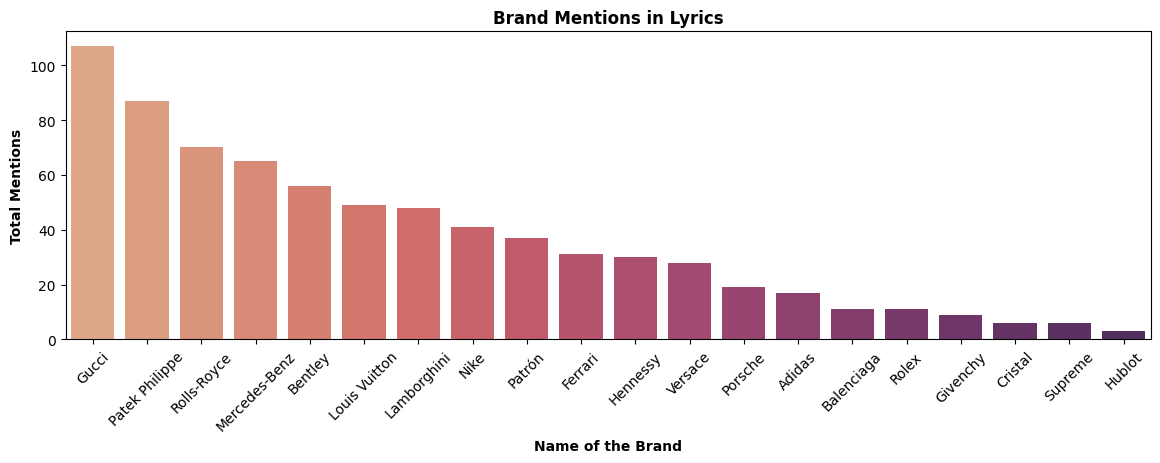

In [28]:
# Create bar plot to visualise brand mentions in lyrics
plt.figure(figsize = (14, 4))

sns.barplot(data = result_df, x = "Brand", y ="Total Mentions", palette = "flare")

# Plot Visual Changes
plt.title('Brand Mentions in Lyrics', fontweight = 'bold')
plt.xlabel('Name of the Brand', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('Total Mentions', fontweight = 'bold')

# Which Artist Had the Highest Mentions?

In [29]:
# Create a table showing total mentions of all artists
totals = [chainz_total_only, arocky_total_only, cardib_total_only, future_total_only, drake_total_only, guccim_total_only, kanyew_total_only, nickim_total_only, postm_total_only, tscott_total_only]
total_mentions_df = pd.concat(totals, ignore_index = True)

In [30]:
total_mentions_df = total_mentions_df.sort_values(by = 'Total Mentions', ascending = False).reset_index(drop = True)
total_mentions_df.rename(columns = {'Brand' : 'Artist'}, inplace = True)

#total_mentions_df = total_mentions_df.drop('Brand', axis = 1)
total_mentions_df

,Artist,Total Mentions
0,Kanye West,106.0
1,Nicki Minja,92.0
2,Gucci Mane,91.0
3,Travis Scott,83.0
4,A$AP Rocky,76.0
5,Future,74.0
6,Drake,65.0
7,Cardi B,51.0
8,2 Chainz,49.0
9,Post Malone,44.0


/var/folders/4d/9j99tx5543j_yj5yhz5lzxvm0000gn/T/ipykernel_31382/1044221644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_mentions_df, x = 'Artist', y = 'Total Mentions', palette = 'viridis')


Text(0, 0.5, 'Total Mentions')

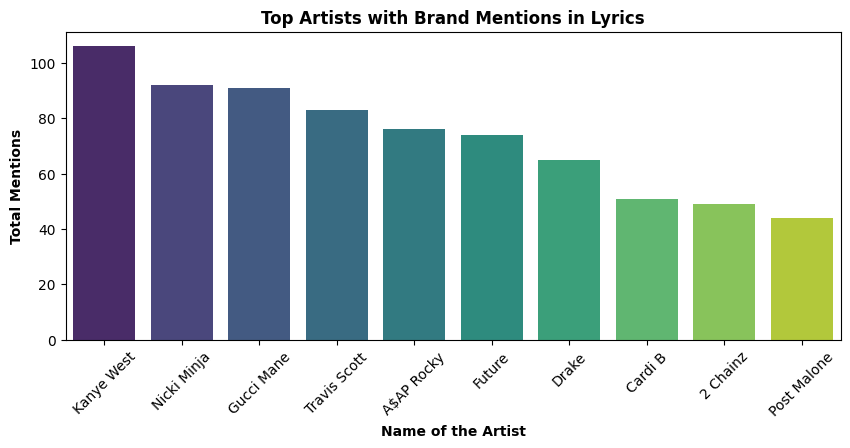

In [31]:
# Create bar plot to visualise top artists
plt.figure(figsize = (10, 4))

sns.barplot(data = total_mentions_df, x = 'Artist', y = 'Total Mentions', palette = 'viridis')

# Plot visual changes
plt.title('Top Artists with Brand Mentions in Lyrics', fontweight = 'bold')
plt.xlabel('Name of the Artist', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('Total Mentions', fontweight = 'bold')

# What was the Impact?

In [32]:
lvgtrends = pd.read_csv('lvgtrends.csv')

In [33]:
lvgtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   83 non-null     object
 1   Score   83 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


Text(0, 0.5, 'Search Interest')

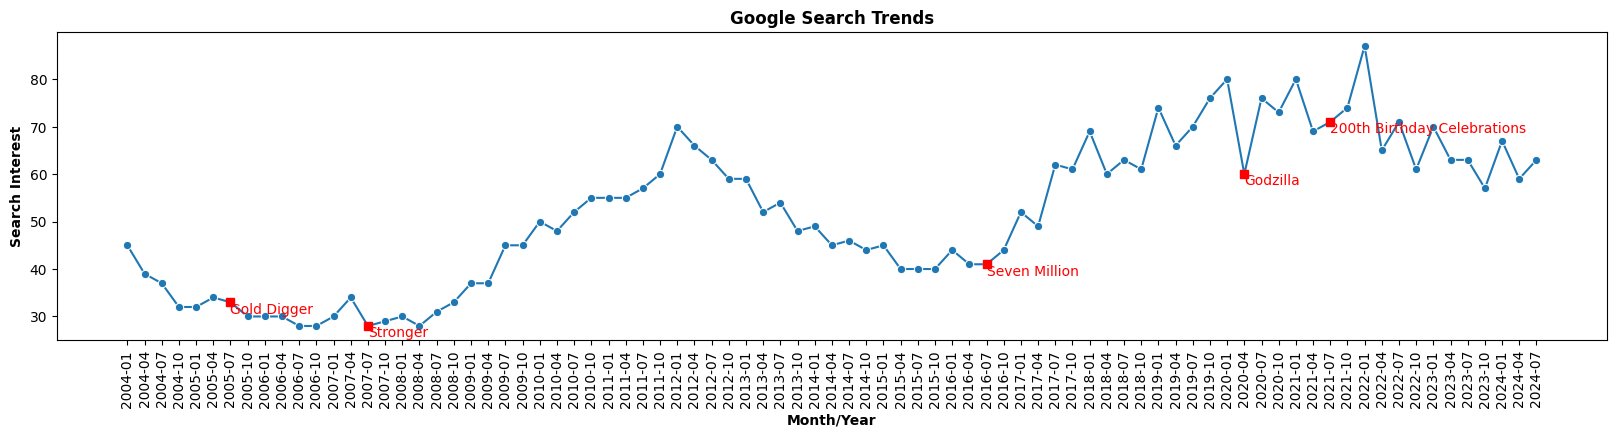

In [34]:
# Creat plot to show trends in google search for Louis Vuitton
plt.figure(figsize = (20, 4))

sns.lineplot(data = lvgtrends, x = 'Month', y = 'Score', marker = 'o')

# Adding points of interest on the plot
points_of_interest = [(6, 33,'Gold Digger'), (14, 28, 'Stronger'), (50, 41, 'Seven Million'), (65, 60, 'Godzilla'), (70, 71, '200th Birthday Celebrations')] 

for (x, y, label) in points_of_interest:
    plt.plot(lvgtrends['Month'][x], y, 's', color='red')
    plt.text(lvgtrends['Month'][x], y, label, fontsize = 10, color = 'red', va ='top')

# Plot visual changes
plt.title('Google Search Trends', fontweight = 'bold')
plt.xlabel('Month/Year', fontweight = 'bold')
plt.xticks(rotation = 90)
plt.ylabel('Search Interest', fontweight = 'bold')